# Analyzing Austin PD's Crime Reports Dataset

I downloaded the latest copy of the dataset from data.austintexas.gov on 7/1/2020. The exported dataset seems to contain more data to work with than if one were to utilize the API, even if it is not continuously up-to-date. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Robert\Downloads\Crime_Reports.csv", parse_dates=True)

C:\Users\Robert\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Cleaning the data

In [3]:
pd.set_option('display.max_columns', None)

# Examining the dataset
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.index)
print('----------------------------------')
display(df.columns)
print('----------------------------------')
display(df.describe())
print('----------------------------------')
display(df.isnull().sum())

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20125003262,PROTECTIVE ORDER,3829,N,01/23/2012 05:17:00 AM,01/23/2012,517.0,01/23/2012 05:17:00 AM,01/23/2012,517.0,RESIDENCE / HOME,UNKNOWN,NaN,NaN,DA,1,491,NaN,N,01/23/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20072832112,ASSAULT WITH INJURY,900,N,10/10/2007 09:00:00 PM,10/10/2007,2100.0,10/10/2007 10:00:00 PM,10/10/2007,2200.0,BAR / NIGHT CLUB,HOT BODIES CLUB HWY 71 & BURLESON RD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20081232700,FAMILY DISTURBANCE,3400,N,05/02/2008 11:11:00 PM,05/02/2008,2311.0,05/02/2008 11:11:00 PM,05/02/2008,2311.0,RESIDENCE / HOME,9702 CHILSOM TRAIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006900236,ASSAULT WITH INJURY,900,N,03/31/2006 02:50:00 AM,03/31/2006,250.0,03/31/2006 02:50:00 AM,03/31/2006,250.0,RESIDENCE / HOME,721 LAMAR PLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20081002040,CRASH/FAIL STOP AND RENDER AID,3604,N,04/09/2008 07:04:00 PM,04/09/2008,1904.0,04/09/2008 09:08:00 PM,04/09/2008,2108.0,STREETS / HWY / ROAD / ALLEY,2500 BLOCK OF GUADALUPE,NaN,NaN,NaN,NaN,NaN,NaN,N,12/16/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2250212,20175007735,HARASSMENT,2703,N,01/31/2017 10:31:00 AM,01/31/2017,1031.0,02/23/2017 10:31:00 AM,02/23/2017,1031.0,RESIDENCE / HOME,9802 ROXANNA DR,78748.0,5.0,FR,1,535,17.47,N,03/16/2017,NaN,NaN,3088221.0,3088221.0,30.176236,-97.827862,"(30.17623555, -97.82786218)"
2250213,20108800371,CRIMINAL TRESPASS/TRANSIENT,2721,N,03/29/2010 07:17:00 AM,03/29/2010,717.0,03/29/2010 07:17:00 AM,03/29/2010,717.0,CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,203 E 10TH ST,78701.0,9.0,GE,1,379,11.00,N,03/30/2010,NaN,NaN,3115283.0,3115283.0,30.271040,-97.739653,"(30.27103998, -97.73965326)"
2250214,2003924076801,BURGLARY OF RESIDENCE,500,N,01/04/2003 06:30:00 PM,01/04/2003,1830.0,01/05/2003 10:31:00 AM,01/05/2003,1031.0,RESIDENCE / HOME,1809 SANCHEZ ST,78702.0,1.0,CH,3,394,8.00,N,NaN,220,Burglary,3125587.0,3125587.0,30.281489,-97.706719,"(30.28148881, -97.70671938)"
2250215,2006902409,BURGLARY NON RESIDENCE,502,N,03/31/2006 10:46:00 PM,03/31/2006,2246.0,03/31/2006 10:46:00 PM,03/31/2006,2246.0,COMMERCIAL / OFFICE BUILDING,6016 OLD FREDERICKSBURG RD,78749.0,8.0,DA,6,78,NaN,NaN,05/10/2006,220,Burglary,3081299.0,3081299.0,30.234197,-97.848283,"(30.2341966, -97.8482829)"
2250216,2010232299,FAMILY DISTURBANCE,3400,N,01/23/2010 10:44:00 PM,01/23/2010,2244.0,01/24/2010 12:14:00 AM,01/24/2010,14.0,RESIDENCE / HOME,9307 GEORGIAN DR,78753.0,4.0,ED,1,250,18.00,N,02/06/2010,NaN,NaN,3129098.0,3129098.0,30.360317,-97.693437,"(30.36031662, -97.69343723)"


----------------------------------


RangeIndex(start=0, stop=2250217, step=1)

----------------------------------


Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

----------------------------------


,Incident Number,Highest Offense Code,Occurred Time,Report Time,Zip Code,Council District,Census Tract,X-coordinate,Y-coordinate,Latitude,Longitude
count,2.250217e+06,2.250217e+06,2.250133e+06,2.250216e+06,2.236556e+06,2.203530e+06,1.024903e+06,2.240445e+06,2.240445e+06,2.212336e+06,2.212336e+06
mean,6.809877e+10,1.771211e+03,1.326749e+03,1.324727e+03,7.872994e+04,4.938078e+00,1.820024e+02,3.077888e+06,3.077888e+06,3.028860e+01,-9.773381e+01
std,3.142371e+11,1.196312e+03,7.209643e+02,6.700268e+02,4.152879e+02,2.849818e+00,6.541739e+03,3.633238e+05,3.633238e+05,1.797962e-01,2.904494e-01
min,2.003500e+04,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-3.262185e+07,-3.262185e+07,1.204500e-04,-9.918164e+01
25%,2.005156e+10,6.010000e+02,8.060000e+02,9.000000e+02,7.870500e+04,3.000000e+00,1.706000e+01,3.108737e+06,3.108737e+06,3.023259e+01,-9.775843e+01
50%,2.009504e+10,1.400000e+03,1.432000e+03,1.407000e+03,7.874100e+04,4.000000e+00,1.828000e+01,3.117205e+06,3.117205e+06,3.027344e+01,-9.773245e+01
75%,2.014503e+10,2.721000e+03,1.935000e+03,1.900000e+03,7.875200e+04,7.000000e+00,2.310000e+01,3.126402e+06,3.126402e+06,3.034667e+01,-9.770254e+01
max,2.020202e+12,8.905000e+03,2.400000e+03,2.359000e+03,7.875900e+04,1.000000e+01,9.601000e+05,3.889524e+07,3.889524e+07,4.216665e+01,-1.335600e-04


----------------------------------


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    20850
Address                             12
Zip Code                         13661
Council District                 46687
APD Sector                        8667
APD District                      9135
PRA                              10352
Census Tract                   1225314
Clearance Status                601384
Clearance Date                  332171
UCR Category                   1486802
Category Description           1486802
X-coordinate                      9772
Y-coordinate                      9772
Latitude                         37881
Longitude                

In [4]:
# Dropping null values from 'Occurred Date Time', convert it to datetime64 & set it as the index
df = df.dropna(subset=['Occurred Date Time'])
df['Occurred Date Time'] = df['Occurred Date Time'].astype('datetime64')
df.set_index('Occurred Date Time', inplace=True)
df.sort_index(inplace=True)

# Dropping null 'zip code' values
df.dropna(subset=['Zip Code'], inplace=True)

display(df.index)

DatetimeIndex(['2003-01-01 00:00:00', '2003-01-01 00:00:00',
               '2003-01-01 00:00:00', '2003-01-01 00:00:00',
               '2003-01-01 00:00:00', '2003-01-01 00:00:00',
               '2003-01-01 00:00:00', '2003-01-01 00:00:00',
               '2003-01-01 00:00:00', '2003-01-01 00:00:00',
               ...
               '2020-07-11 10:20:00', '2020-07-11 11:30:00',
               '2020-07-11 11:39:00', '2020-07-11 11:55:00',
               '2020-07-11 12:00:00', '2020-07-11 12:00:00',
               '2020-07-11 12:31:00', '2020-07-11 12:45:00',
               '2020-07-11 13:00:00', '2020-07-11 13:29:00'],
              dtype='datetime64[ns]', name='Occurred Date Time', length=2236404, freq=None)

In [5]:
# Checking for duplicates
display(df.duplicated().sum())

0

## Exploratory Analysis

In [6]:
# Reexamining the head, tail, nulls & stats
display(df.head())
print('----------------------------------')
display(df.tail())
print('----------------------------------')
display(df.isnull().sum())
print('----------------------------------')
display(df.describe())

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-01,2005901307,SEXUAL ASSAULT OF CHILD/OBJECT,1707,N,01/01/2003,0.0,03/31/2005 04:40:00 PM,03/31/2005,1640.0,RESIDENCE / HOME,6600 BLOCK ED BLUESTEIN BLVD,78723.0,NaN,ED,3,299,2201.00,C,07/12/2005,11C,Rape,0.0,0.0,NaN,NaN,NaN
2003-01-01,20105018815,IDENTITY THEFT,4022,N,01/01/2003,0.0,04/14/2010 02:59:00 PM,04/14/2010,1459.0,RESIDENCE / HOME,1088 PARK PLZ,78753.0,4.0,ED,3,251,18.13,O,04/15/2010,NaN,NaN,3131784.0,3131784.0,30.348871,-97.685233,"(30.34887091, -97.6852326)"
2003-01-01,20055067732,IDENTITY THEFT,4022,N,01/01/2003,0.0,02/14/2005 05:30:00 PM,02/14/2005,1730.0,COMMERCIAL / OFFICE BUILDING,715 E 8TH ST,78701.0,9.0,GE,2,382,NaN,NaN,NaN,NaN,NaN,3116884.0,3116884.0,30.267553,-97.734674,"(30.26755343, -97.73467415)"
2003-01-01,20071300652,INDECENCY WITH A CHILD/CONTACT,1709,Y,01/01/2003,0.0,05/10/2007 09:52:00 AM,05/10/2007,952.0,RESIDENCE / HOME,9400 BLOCK GROUSE MEADOW LN,78758.0,4.0,ED,1,238,NaN,C,07/02/2007,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2003-01-01,20035015514,IDENTITY THEFT,4022,N,01/01/2003,0.0,10/06/2003 10:52:00 AM,10/06/2003,1052.0,RESIDENCE / HOME,5708 WHITEBROOK DR,78724.0,1.0,CH,7,300,22.01,NaN,10/31/2003,NaN,NaN,3141658.0,3141658.0,30.305744,-97.655117,"(30.3057436, -97.65511734)"


----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-11 12:00:00,20205026883,HARASSMENT,2703,N,07/11/2020,1200.0,07/11/2020 09:37:00 PM,07/11/2020,2137.0,RESIDENCE / HOME,7736 MARBLE CREST DR,78747.0,2.0,FR,7,600,NaN,NaN,NaN,NaN,NaN,3115020.0,3115020.0,30.162049,-97.743411,"(30.16204911, -97.7434106)"
2020-07-11 12:31:00,20201930625,DISTURBANCE - OTHER,3401,N,07/11/2020,1231.0,07/11/2020 12:31:00 PM,07/11/2020,1231.0,GAS / SERVICE STATIONS,15010 FM 1825 RD,78660.0,7.0,ED,6,159,NaN,NaN,NaN,NaN,NaN,3137063.0,3137063.0,30.443133,-97.665885,"(30.44313312, -97.66588507)"
2020-07-11 12:45:00,20205026879,BURGLARY OF VEHICLE,601,N,07/11/2020,1245.0,07/11/2020 08:35:00 PM,07/11/2020,2035.0,PARK / PLAYGROUND,1314 EXPOSITION BLVD,78703.0,10.0,BA,7,369,NaN,NaN,NaN,23F,Theft,3104246.0,3104246.0,30.290831,-97.774101,"(30.29083084, -97.77410057)"
2020-07-11 13:00:00,20205026880,THEFT,600,N,07/11/2020,1300.0,07/11/2020 08:50:00 PM,07/11/2020,2050.0,SPECIALTY STORE (TV FUR ETC.),2901 S CAPITAL OF TEXAS HWY NB,78746.0,8.0,DA,5,462,NaN,NaN,NaN,23H,Theft,3094135.0,3094135.0,30.257886,-97.807007,"(30.25788603, -97.80700704)"
2020-07-11 13:29:00,20201930676,DATING DISTURBANCE,2400,N,07/11/2020,1329.0,07/11/2020 01:29:00 PM,07/11/2020,1329.0,STREETS / HWY / ROAD / ALLEY,500 E 7TH ST,78701.0,9.0,GE,2,382,NaN,NaN,NaN,NaN,NaN,3115951.0,3115951.0,30.267976,-97.737619,"(30.26797616, -97.737619)"


----------------------------------


Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date                        0
Occurred Time                        0
Report Date Time                     0
Report Date                          0
Report Time                          0
Location Type                    20384
Address                              0
Zip Code                             0
Council District                 33026
APD Sector                           8
APD District                        11
PRA                                 11
Census Tract                   1212429
Clearance Status                596948
Clearance Date                  328973
UCR Category                   1475275
Category Description           1475275
X-coordinate                         7
Y-coordinate                         7
Latitude                         27371
Longitude                        27371
Location                 

----------------------------------


,Incident Number,Highest Offense Code,Occurred Time,Report Time,Zip Code,Council District,Census Tract,X-coordinate,Y-coordinate,Latitude,Longitude
count,2.236404e+06,2.236404e+06,2.236404e+06,2.236404e+06,2.236404e+06,2.203378e+06,1.023975e+06,2.236397e+06,2.236397e+06,2.209033e+06,2.209033e+06
mean,6.825632e+10,1.767867e+03,1.326642e+03,1.324585e+03,7.872994e+04,4.938052e+00,1.625654e+02,3.078594e+06,3.078594e+06,3.028955e+01,-9.773457e+01
std,3.147250e+11,1.195479e+03,7.210872e+02,6.700083e+02,4.153019e+02,2.849807e+00,5.270481e+03,3.437781e+05,3.437781e+05,7.695306e-02,8.055901e-02
min,2.003500e+04,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.204500e-04,-9.819029e+01
25%,2.005156e+10,6.010000e+02,8.060000e+02,9.000000e+02,7.870500e+04,3.000000e+00,1.706000e+01,3.108757e+06,3.108757e+06,3.023259e+01,-9.775843e+01
50%,2.009504e+10,1.400000e+03,1.432000e+03,1.407000e+03,7.874100e+04,4.000000e+00,1.828000e+01,3.117216e+06,3.117216e+06,3.027344e+01,-9.773245e+01
75%,2.014503e+10,2.721000e+03,1.935000e+03,1.900000e+03,7.875200e+04,7.000000e+00,2.310000e+01,3.126403e+06,3.126403e+06,3.034665e+01,-9.770254e+01
max,2.020202e+12,8.905000e+03,2.359000e+03,2.359000e+03,7.875900e+04,1.000000e+01,9.508000e+05,3.889524e+07,3.889524e+07,3.066885e+01,-1.335600e-04


### Question 1. What areas of Austin have the highest crime rates? 

78741.0    202779
78753.0    174112
78701.0    166261
78758.0    155098
78704.0    151468
78745.0    147554
78702.0    134685
78744.0    123448
78723.0    115755
78752.0     82947
Name: Zip Code, dtype: int64

----------------------------------


78741.0    0.090672
78753.0    0.077854
78701.0    0.074343
78758.0    0.069352
78704.0    0.067728
78745.0    0.065978
78702.0    0.060224
78744.0    0.055199
78723.0    0.051759
78752.0    0.037089
Name: Zip Code, dtype: float64

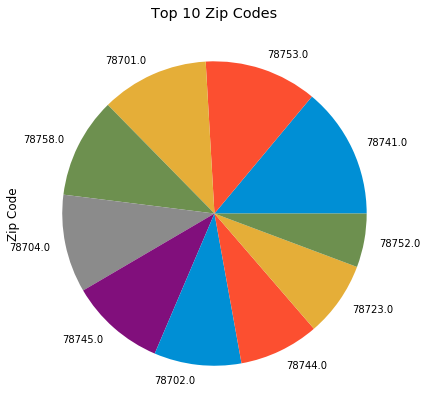

In [7]:
# Create dataframe for the top 10 zipcodes with the highest crime rates 
zip_codes = df['Zip Code'].value_counts().head(10)
display(zip_codes)

# Displaying the top 10 crime rates per zipcode as proportions
print('----------------------------------')
display(df['Zip Code'].value_counts(normalize=True).head(10))

# Visualizing the zip codes
zip_codes.plot.pie(figsize=(7,7))
plt.title('Top 10 Zip Codes')
plt.show()

78741 has the highest amount of crime (9.07%) by 1.29 percentage points above 78753 which comes in second (7.79%). The next major decrease occurs between 78723 (5.18%) & 78752 (3.71%) with 1.47 percentage points. 

(174112, 26)

----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-01 00:00:00,20105018815,IDENTITY THEFT,4022,N,01/01/2003,0.0,04/14/2010 02:59:00 PM,04/14/2010,1459.0,RESIDENCE / HOME,1088 PARK PLZ,78753.0,4.0,ED,3,251,18.13,O,04/15/2010,NaN,NaN,3131784.0,3131784.0,30.348871,-97.685233,"(30.34887091, -97.6852326)"
2003-01-01 00:01:00,2003924376595,CRIMINAL MISCHIEF,1400,N,01/01/2003,1.0,01/01/2003 01:11:00 PM,01/01/2003,1311.0,PARKING LOTS / GARAGE,8800 N I 35 SB SVC RD,78753.0,4.0,ID,2,250,NaN,N,NaN,NaN,NaN,3129670.0,3129670.0,30.352849,-97.691828,"(30.3528492, -97.6918276)"
2003-01-01 00:01:00,20035007933,HARASSMENT,2703,N,01/01/2003,1.0,08/25/2003 11:37:00 AM,08/25/2003,1137.0,RESIDENCE / HOME,9725 N I 35 NB SVC RD,78753.0,NaN,ED,7,241,1833.00,NaN,08/26/2003,NaN,NaN,3131637.0,3131637.0,30.361871,-97.685342,"(30.36187147, -97.68534188)"
2003-01-01 00:01:00,2003924477485,STATUTORY RAPE OF CHILD,208,N,01/01/2003,1.0,04/25/2003 12:51:00 PM,04/25/2003,1251.0,RESIDENCE / HOME,300 BLOCK W RUNDBERG LN,78753.0,4.0,ED,1,240,NaN,N,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2003-01-01 00:01:00,20035016697,THEFT BY EMBEZZLEMENT,1200,N,01/01/2003,1.0,10/13/2003 08:49:00 AM,10/13/2003,849.0,COMMERCIAL / OFFICE BUILDING,313 E RUNDBERG LN,78753.0,4.0,ED,1,250,18.00,C,10/20/2003,NaN,NaN,3129590.0,3129590.0,30.359639,-97.691895,"(30.35963853, -97.69189538)"


----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-10 18:45:00,20205026840,BURGLARY OF VEHICLE,601,N,07/10/2020,1845.0,07/11/2020 10:06:00 AM,07/11/2020,1006.0,HOTEL / MOTEL / ETC.,13000 N IH 35 SVRD NB,78753.0,7.0,ED,6,206,NaN,NaN,NaN,23F,Theft,3135104.0,3135104.0,30.416060,-97.672851,"(30.41605976, -97.67285102)"
2020-07-10 19:02:00,20205026821,BURGLARY OF VEHICLE,601,N,07/10/2020,1902.0,07/10/2020 07:02:00 PM,07/10/2020,1902.0,PARKING LOTS / GARAGE,9600 N IH 35 SVRD SB,78753.0,4.0,ED,1,240,NaN,NaN,NaN,23F,Theft,3131299.0,3131299.0,30.362048,-97.686409,"(30.36204752, -97.68640906)"
2020-07-10 21:45:00,20201921415,CRIMINAL TRESPASS,2716,N,07/10/2020,2145.0,07/10/2020 09:45:00 PM,07/10/2020,2145.0,RESTAURANTS,8214 N IH 35 SVRD SB,78753.0,4.0,ED,1,250,NaN,N,07/11/2020,NaN,NaN,3127919.0,3127919.0,30.345467,-97.697582,"(30.34546733, -97.69758233)"
2020-07-10 22:13:00,20201921366,FAMILY DISTURBANCE,3400,N,07/10/2020,2213.0,07/10/2020 10:13:00 PM,07/10/2020,2213.0,RESIDENCE / HOME,12126 TROTWOOD DR,78753.0,1.0,ED,7,223,NaN,N,07/11/2020,NaN,NaN,3138288.0,3138288.0,30.389472,-97.663483,"(30.38947237, -97.6634832)"
2020-07-10 22:30:00,20205026833,IDENTITY THEFT,4022,N,07/10/2020,2230.0,07/11/2020 08:34:00 AM,07/11/2020,834.0,RESIDENCE / HOME,1400 E RUNDBERG LN,78753.0,4.0,ED,7,241,NaN,NaN,NaN,NaN,NaN,3134061.0,3134061.0,30.352273,-97.677918,"(30.35227315, -97.67791808)"


----------------------------------


THEFT                             16817
BURGLARY OF VEHICLE               15601
FAMILY DISTURBANCE                14191
CRIMINAL MISCHIEF                  9139
THEFT BY SHOPLIFTING               7442
ASSAULT W/INJURY-FAM/DATE VIOL     6977
BURGLARY OF RESIDENCE              5972
DWI                                4762
DISTURBANCE - OTHER                4648
CUSTODY ARREST TRAFFIC WARR        4294
Name: Highest Offense Description, dtype: int64

----------------------------------


THEFT                             0.096587
BURGLARY OF VEHICLE               0.089603
FAMILY DISTURBANCE                0.081505
CRIMINAL MISCHIEF                 0.052489
THEFT BY SHOPLIFTING              0.042743
ASSAULT W/INJURY-FAM/DATE VIOL    0.040072
BURGLARY OF RESIDENCE             0.034300
DWI                               0.027350
DISTURBANCE - OTHER               0.026695
CUSTODY ARREST TRAFFIC WARR       0.024662
Name: Highest Offense Description, dtype: float64

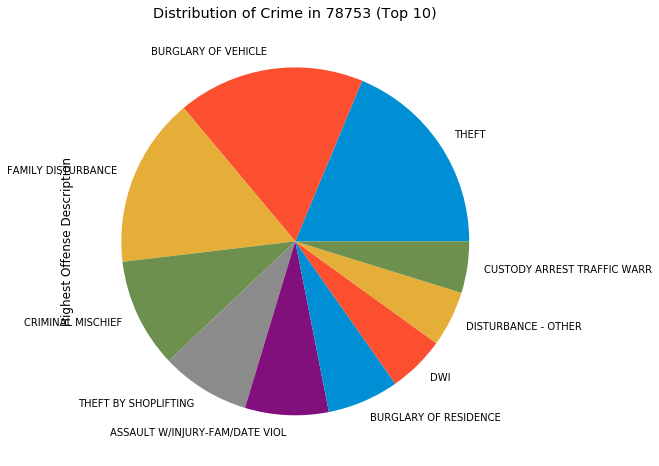

In [8]:
# Examining crime in the 78753 area
df_53 = df[df['Zip Code'] == 78753]
display(df_53.shape)
print('----------------------------------')
display(df_53.head())
print('----------------------------------')
display(df_53.tail())

# Create a dataframe for the top 10 crime categories in 78753
df_53_off = df_53['Highest Offense Description'].value_counts().head(10)
print('----------------------------------')
display(df_53_off)
print('----------------------------------')
# Displaying them as percentages
display(df_53['Highest Offense Description'].value_counts(normalize=True).head(10))


# Visualizing the dataframe
df_53_off.plot.pie(figsize=(8,8))
plt.title('Distribution of Crime in 78753 (Top 10)')
plt.show()

In [9]:
# df_53.to_csv(r"C:\Users\Robert\OneDrive\Desktop\df_53.csv")

(202779, 26)

----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-01 00:00:00,20125023519,IDENTITY THEFT,4022,N,01/01/2003,0.0,05/25/2012 11:04:00 AM,05/25/2012,1104.0,RESIDENCE / HOME,1105 LILY TER,78741.0,3.0,HE,3,443,23.18,N,05/25/2012,NaN,NaN,3127515.0,3127515.0,30.234098,-97.701901,"(30.23409756, -97.70190149)"
2003-01-01 00:01:00,20155010359,IDENTITY THEFT,4022,N,01/01/2003,1.0,03/12/2015 10:17:00 AM,03/12/2015,1017.0,RESIDENCE / HOME,1817 E OLTORF ST,78741.0,3.0,HE,2,482,NaN,N,03/12/2015,NaN,NaN,3116626.0,3116626.0,30.231615,-97.736458,"(30.2316152, -97.73645832)"
2003-01-01 00:01:00,2003924102401,ASSAULT WITH INJURY,900,N,01/01/2003,1.0,01/23/2003 03:18:00 PM,01/23/2003,1518.0,STREETS / HWY / ROAD / ALLEY,600 BLOCK VARGAS RD,78741.0,3.0,HE,5,444,23.12,O,01/29/2003,NaN,NaN,3130579.0,3130579.0,30.236581,-97.692129,"(30.23658076, -97.69212854)"
2003-01-01 00:01:00,20085038100,IDENTITY THEFT,4022,N,01/01/2003,1.0,07/23/2008 11:07:00 AM,07/23/2008,1107.0,RESIDENCE / HOME,2430 CROMWELL CIR,78741.0,3.0,HE,4,458,23.14,NaN,08/25/2008,NaN,NaN,3121531.0,3121531.0,30.226640,-97.721057,"(30.22664019, -97.7210571)"
2003-01-01 00:01:00,20151840488,AGG SEXUAL ASSAULT CHILD/OBJEC,1712,Y,01/01/2003,1.0,07/03/2015 08:11:00 AM,07/03/2015,811.0,RESIDENCE / HOME,6400 BLOCK LYNCH LN,78741.0,3.0,HE,5,444,23.12,N,05/31/2016,11C,Rape,0.0,0.0,NaN,NaN,NaN


----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-10 12:47:00,20201920693,DATING DISTURBANCE,2400,N,07/10/2020,1247.0,07/10/2020 01:12:00 PM,07/10/2020,1312.0,RESIDENCE / HOME,2601 S PLEASANT VALLEY RD,78741.0,3.0,HE,4,484,NaN,NaN,NaN,NaN,NaN,3119369.0,3119369.0,30.226425,-97.727910,"(30.22642499, -97.72791034)"
2020-07-10 15:45:00,20205026807,RECKLESS DAMAGE,1401,N,07/10/2020,1545.0,07/10/2020 05:25:00 PM,07/10/2020,1725.0,STREETS / HWY / ROAD / ALLEY,S IH 35 NB / E OLTORF TO IH 35 NB RAMP,78741.0,9.0,HE,1,456,NaN,NaN,NaN,NaN,NaN,3116115.0,3116115.0,30.239106,-97.737876,"(30.23910558, -97.73787553)"
2020-07-10 16:56:00,20201921040,AGG ASSAULT FAM/DATE VIOLENCE,402,Y,07/10/2020,1656.0,07/10/2020 07:04:00 PM,07/10/2020,1904.0,STREETS / HWY / ROAD / ALLEY,E RIVERSIDE DR / ROYAL CREST DR,78741.0,3.0,HE,2,441,NaN,NaN,NaN,13A,Aggravated Assault,3119118.0,3119118.0,30.241785,-97.728291,"(30.24178512, -97.728291)"
2020-07-10 18:00:00,20205026824,BURGLARY OF VEHICLE,601,N,07/10/2020,1800.0,07/10/2020 06:00:00 PM,07/10/2020,1800.0,PARKING LOTS / GARAGE,517 S PLEASANT VALLEY RD,78741.0,3.0,HE,3,442,NaN,NaN,NaN,23F,Theft,3123724.0,3123724.0,30.246106,-97.713583,"(30.24610576, -97.71358348)"
2020-07-10 23:32:00,20201921580,BURGLARY NON RESIDENCE,502,N,07/10/2020,2332.0,07/10/2020 11:32:00 PM,07/10/2020,2332.0,LIQUOR STORE,1717 S PLEASANT VALLEY RD,78741.0,3.0,HE,3,442,NaN,N,07/10/2020,220,Burglary,3121741.0,3121741.0,30.235131,-97.720162,"(30.23513149, -97.72016225)"


----------------------------------


FAMILY DISTURBANCE                19848
BURGLARY OF VEHICLE               19526
THEFT                             15322
CRIMINAL MISCHIEF                 10817
ASSAULT W/INJURY-FAM/DATE VIOL     9503
BURGLARY OF RESIDENCE              8750
PUBLIC INTOXICATION                6350
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5596
HARASSMENT                         5380
Name: Highest Offense Description, dtype: int64

----------------------------------


FAMILY DISTURBANCE                0.097880
BURGLARY OF VEHICLE               0.096292
THEFT                             0.075560
CRIMINAL MISCHIEF                 0.053344
ASSAULT W/INJURY-FAM/DATE VIOL    0.046864
BURGLARY OF RESIDENCE             0.043150
PUBLIC INTOXICATION               0.031315
CUSTODY ARREST TRAFFIC WARR       0.029643
DWI                               0.027597
HARASSMENT                        0.026531
Name: Highest Offense Description, dtype: float64

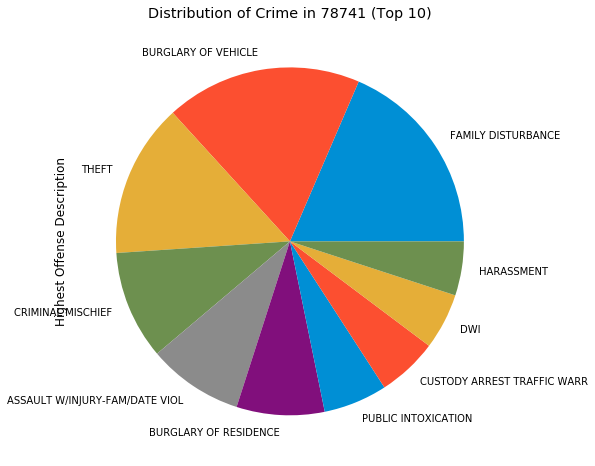

In [10]:
# Create a dataframe for crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df['Zip Code'] == 78741]
display(df_41.shape)
print('----------------------------------')
display(df_41.head())
print('----------------------------------')
display(df_41.tail())

# Create a dataframe for the top 10 crime categories in the zipcode
df_41_off = df_41['Highest Offense Description'].value_counts().head(10)
print('----------------------------------')
display(df_41_off)
print('----------------------------------')
# Displaying the categories as proportions
display(df_41['Highest Offense Description'].value_counts(normalize=True).head(10))


# Visualizing the dataframe
df_41_off.plot.pie(figsize=(8,8))
plt.title('Distribution of Crime in 78741 (Top 10)')
plt.show()

In [11]:
# Saving the 78741 data to a csv
# df_41.to_csv(r'C:\Users\Robert\OneDrive\Desktop\df_41.csv')

In [12]:
# sns.jointplot(x='Latitude', y='Longitude', data=df_53, kind='kde', color='r'); sns.jointplot(x='Latitude', y='Longitude', 
#                                                                                             data=df_41, kind='kde', color='b')

### Question 2. How are violent crimes, in particular murders, distributed? 

(380, 26)

----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-01-05 17:40:00,2003920051212,MURDER,100,N,01/05/2003,1740.0,01/05/2003 05:40:00 PM,01/05/2003,1740.0,RESIDENCE / HOME,8615 BOWLING GREEN DR,78757.0,7.0,ID,7,234,18.18,C,02/04/2003,09A,Murder,3118644.0,3118644.0,30.368636,-97.726368,"(30.36863622, -97.726368)"
2003-01-16 01:02:00,2003920160078,MURDER,100,N,01/16/2003,102.0,01/16/2003 01:02:00 AM,01/16/2003,102.0,RESIDENCE / HOME,7508 PROVIDENCE AVE,78752.0,4.0,ID,1,265,NaN,C,01/28/2003,09A,Murder,3128832.0,3128832.0,30.333538,-97.695013,"(30.33353838, -97.69501338)"
2003-01-30 13:27:00,2003920300840,MURDER,100,N,01/30/2003,1327.0,01/30/2003 01:27:00 PM,01/30/2003,1327.0,RESIDENCE / HOME,8225 SAM RAYBURN DR,78753.0,4.0,ED,1,250,NaN,C,05/14/2003,09A,Murder,3127505.0,3127505.0,30.347781,-97.698832,"(30.34778132, -97.69883196)"
2003-02-10 11:36:00,2003920410628,MURDER,100,N,02/10/2003,1136.0,02/10/2003 11:36:00 AM,02/10/2003,1136.0,COMMERCIAL / OFFICE BUILDING,403 E BEN WHITE BLVD SVRD EB,78745.0,3.0,DA,3,492,24.00,C,02/19/2003,09A,Murder,3109128.0,3109128.0,30.220054,-97.760515,"(30.22005429, -97.76051489)"
2003-02-12 16:02:00,2003920430987,MURDER,100,N,02/12/2003,1602.0,02/12/2003 04:02:00 PM,02/12/2003,1602.0,RESIDENCE / HOME,2207 WICKERSHAM LN,78741.0,3.0,HE,4,458,NaN,C,06/14/2003,09A,Murder,3121645.0,3121645.0,30.228991,-97.720632,"(30.22899132, -97.72063244)"


----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-13 12:17:00,20201040605,MURDER,100,N,04/13/2020,1217.0,04/13/2020 04:04:00 PM,04/13/2020,1604.0,RESIDENCE / HOME,3800 ALLEGRO LUGAR,78749.0,8.0,DA,4,80,17.5,C,04/13/2020,09A,Murder,3086653.0,3086653.0,30.219473,-97.831706,"(30.21947347, -97.83170629)"
2020-05-28 22:11:00,20201491601,MURDER,100,N,05/28/2020,2211.0,05/28/2020 10:11:00 PM,05/28/2020,2211.0,RESIDENCE / HOME,1050 SPRINGDALE RD,78721.0,1.0,CH,4,425,NaN,C,06/08/2020,09A,Murder,3130114.0,3130114.0,30.270853,-97.692664,"(30.27085307, -97.69266431)"
2020-06-20 04:33:00,20201720283,MURDER,100,N,06/20/2020,433.0,06/20/2020 04:33:00 AM,06/20/2020,433.0,STREETS / HWY / ROAD / ALLEY,3800 BLOCK ALEXANDRIA DR,78749.0,8.0,DA,7,86,NaN,N,06/24/2020,09A,Murder,3083364.0,3083364.0,30.202446,-97.842561,"(30.20244636, -97.84256119)"
2020-06-24 18:42:00,20201761161,MURDER,100,N,06/24/2020,1842.0,06/24/2020 08:15:00 PM,06/24/2020,2015.0,STREETS / HWY / ROAD / ALLEY,AIRPORT BLVD / GUNTER ST,78721.0,1.0,CH,4,425,NaN,C,06/24/2020,09A,Murder,3128848.0,3128848.0,30.269556,-97.696711,"(30.26955573, -97.69671124)"
2020-07-08 13:49:00,20201900732,MURDER,100,Y,07/08/2020,1349.0,07/08/2020 01:49:00 PM,07/08/2020,1349.0,RESIDENCE / HOME,6118 FAIRWAY ST,78741.0,3.0,HE,3,443,NaN,NaN,NaN,09A,Murder,3127179.0,3127179.0,30.229004,-97.703104,"(30.22900387, -97.70310447)"


(78, 26)

----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-04-25 22:55:00,2003921151985,CAPITAL MURDER,101,N,04/25/2003,2255.0,04/25/2003 10:55:00 PM,04/25/2003,2255.0,RESIDENCE / HOME,1401 E RUNDBERG LN,78753.0,4.0,ED,3,251,18.13,C,05/07/2003,09A,Murder,3133940.0,3133940.0,30.351630,-97.678320,"(30.35162962, -97.67831952)"
2003-08-02 13:30:00,20032140935,CAPITAL MURDER,101,Y,08/02/2003,1330.0,08/02/2003 01:30:00 PM,08/02/2003,1330.0,RESIDENCE / HOME,2700 BLOCK S CONGRESS AVE,78704.0,3.0,DA,2,479,23.08,C,11/05/2003,09A,Murder,0.0,0.0,NaN,NaN,NaN
2003-10-06 07:57:00,20032790370,CAPITAL MURDER,101,N,10/06/2003,757.0,10/06/2003 07:57:00 AM,10/06/2003,757.0,RESIDENCE / HOME,8312 N I 35 SB SVC RD,78753.0,4.0,ID,2,250,18.06,C,12/20/2003,09A,Murder,3128440.0,3128440.0,30.346368,-97.695906,"(30.34636798, -97.69590556)"
2003-11-14 21:53:00,20033181695,CAPITAL MURDER,101,N,11/14/2003,2153.0,11/14/2003 09:53:00 PM,11/14/2003,2153.0,COMMERCIAL / OFFICE BUILDING,3128 MANOR RD,78723.0,1.0,BA,4,900,3.00,NaN,NaN,09A,Murder,3126299.0,3126299.0,30.286819,-97.704318,"(30.28681927, -97.70431788)"
2003-12-03 06:39:00,20033370297,CAPITAL MURDER,101,Y,12/03/2003,639.0,12/03/2003 06:39:00 AM,12/03/2003,639.0,COMMERCIAL / OFFICE BUILDING,6407 SPRINGDALE RD,78723.0,1.0,CH,4,324,21.08,C,12/14/2007,09A,Murder,3137135.0,3137135.0,30.306427,-97.669436,"(30.30642702, -97.66943555)"


----------------------------------


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
Occurred Date Time,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-25 17:55:00,2019251432,CAPITAL MURDER,101,N,01/25/2019,1755.0,01/25/2019 05:55:00 PM,01/25/2019,1755.0,STREETS / HWY / ROAD / ALLEY,8100 BLOCK SONNET AVE,78759.0,10.0,BA,8,231,17.07,C,01/25/2019,09A,Murder,3112478.0,3112478.0,30.366019,-97.745996,"(30.36601926, -97.74599571)"
2019-03-24 00:29:00,2019830062,CAPITAL MURDER,101,N,03/24/2019,29.0,03/24/2019 12:29:00 AM,03/24/2019,29.0,RESIDENCE / HOME,1215 SOUTHPORT DR,78704.0,3.0,DA,2,468,20.05,C,07/01/2019,09A,Murder,3103997.0,3103997.0,30.231741,-97.776455,"(30.23174055, -97.77645505)"
2019-12-12 19:35:00,20193461485,CAPITAL MURDER,101,N,12/12/2019,1935.0,12/12/2019 07:35:00 PM,12/12/2019,1935.0,RESIDENCE / HOME,744 W WILLIAM CANNON DR,78745.0,2.0,FR,4,512,NaN,C,12/19/2019,09A,Murder,3100231.0,3100231.0,30.198357,-97.789263,"(30.19835668, -97.78926252)"
2020-06-23 15:10:00,20201750924,CAPITAL MURDER,101,N,06/23/2020,1510.0,06/23/2020 03:10:00 PM,06/23/2020,1510.0,RESIDENCE / HOME,9210 NORTHGATE BLVD,78758.0,4.0,ED,2,235,NaN,N,07/04/2020,09A,Murder,3121822.0,3121822.0,30.371848,-97.716201,"(30.37184787, -97.71620073)"
2020-06-28 07:50:00,20201800431,CAPITAL MURDER,101,N,06/28/2020,750.0,06/28/2020 07:55:00 AM,06/28/2020,755.0,RESIDENCE / HOME,2904 PECAN SPRINGS RD,78723.0,1.0,ID,4,298,NaN,N,06/29/2020,09A,Murder,3132488.0,3132488.0,30.300825,-97.684320,"(30.30082492, -97.6843195)"


----------------------------------
Murders (Top 10 Zip Codes)
----------------------------------


78741.0    41
78753.0    38
78758.0    36
78723.0    32
78744.0    27
78702.0    24
78752.0    21
78745.0    20
78704.0    16
78701.0    15
Name: Zip Code, dtype: int64

----------------------------------


78741.0    0.107895
78753.0    0.100000
78758.0    0.094737
78723.0    0.084211
78744.0    0.071053
78702.0    0.063158
78752.0    0.055263
78745.0    0.052632
78704.0    0.042105
78701.0    0.039474
Name: Zip Code, dtype: float64

----------------------------------
Capital Murders (Top 10 Zip Codes)
----------------------------------


78723.0    11
78753.0    11
78758.0     7
78741.0     7
78745.0     6
78752.0     6
78744.0     4
78748.0     3
78721.0     3
78702.0     3
Name: Zip Code, dtype: int64

----------------------------------


78723.0    0.141026
78753.0    0.141026
78758.0    0.089744
78741.0    0.089744
78745.0    0.076923
78752.0    0.076923
78744.0    0.051282
78748.0    0.038462
78721.0    0.038462
78702.0    0.038462
Name: Zip Code, dtype: float64

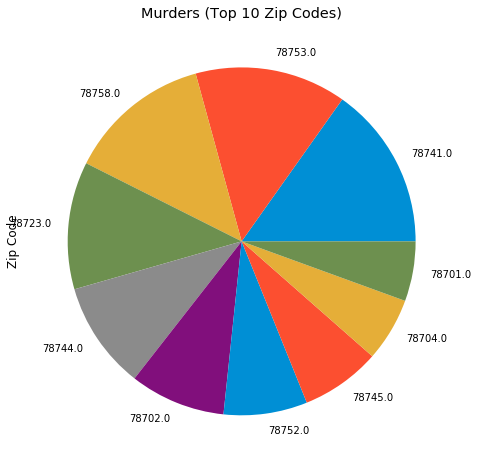

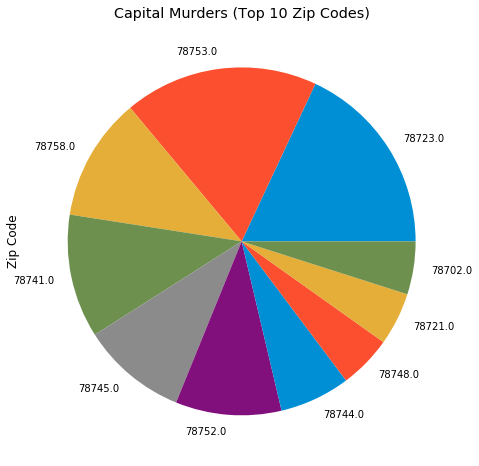

(<seaborn.axisgrid.JointGrid at 0x1a860b81208>,
 <seaborn.axisgrid.JointGrid at 0x1a860b847c8>)

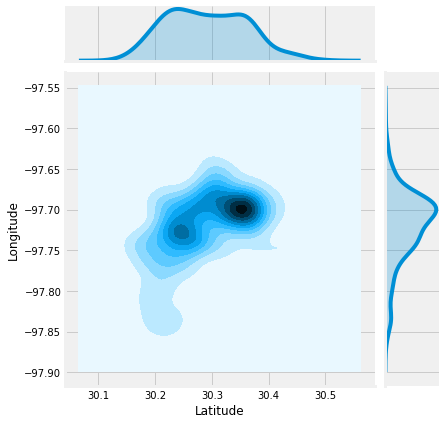

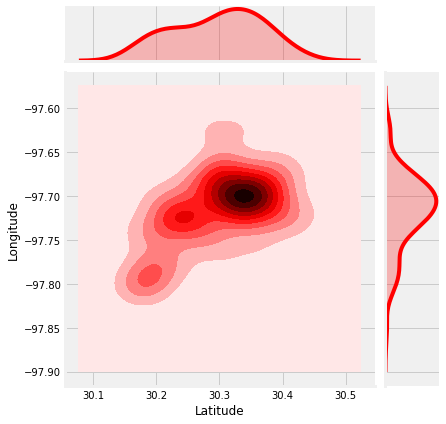

In [13]:
# Create a dataframe for murders & capital murders
df_mur = df[df['Highest Offense Description'] == 'MURDER']
df_mur_cap = df[df['Highest Offense Description'] == 'CAPITAL MURDER']

# Examine the dataframe
display(df_mur.shape)
print('----------------------------------')
display(df_mur.head())
print('----------------------------------')
display(df_mur.tail())

display(df_mur_cap.shape)
print('----------------------------------')
display(df_mur_cap.head())
print('----------------------------------')
display(df_mur_cap.tail())



# What are the top 10 zipcodes for murders? 
print('----------------------------------')
print('Murders (Top 10 Zip Codes)')
print('----------------------------------')
df_mur_val = df_mur['Zip Code'].value_counts().head(10)
display(df_mur_val)
print('----------------------------------')
display(df_mur['Zip Code'].value_counts(normalize=True).head(10))

# What are the top 10 zipcodes for capital murders? 
print('----------------------------------')
print('Capital Murders (Top 10 Zip Codes)')
print('----------------------------------')
df_mur_cap_val = df_mur_cap['Zip Code'].value_counts().head(10)
display(df_mur_cap_val)
print('----------------------------------')
display(df_mur_cap['Zip Code'].value_counts(normalize=True).head(10))

# Visualizing the two dataframes
df_mur_val.plot.pie(figsize=(8,8))
plt.title('Murders (Top 10 Zip Codes)')
plt.show()

df_mur_cap_val.plot.pie(figsize=(8,8))
plt.title('Capital Murders (Top 10 Zip Codes)')
plt.show()

sns.jointplot(x='Latitude', y='Longitude', kind='kde', data=df_mur), sns.jointplot(x='Latitude', y='Longitude', kind='kde', 
                                                                                  data=df_mur_cap, color='r')